In [1]:
from xgboost import XGBClassifier
import warnings
from tabpfn import TabPFNClassifier
import numpy as np
import pandas as pd
import os
from evaluate import scores
import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from data_prep_utils import *
import matplotlib.pyplot as plt
import torch
import openml

In [6]:
openml_medical_id = [13, 25, 49, 51, 53, 55, 336, 337, 446, 778, 798, 949, 1488, 4329, 41430]
openml_non_medical_id = [40, 43, 56, 59,333,334,335, 450, 451, 756, 872, 925,  1447, 40705, 40706]
print(len(openml_medical_id), len(openml_non_medical_id))

15 15


In [7]:
# returns average proportion of zeros per feature
def get_sparsity(X, categorical_indicator):
    # remove categorical features
    X = X[:,np.logical_not(categorical_indicator)]
    if X.shape[1]==0:
        print("Only categorical features in this dataset!")
        return False, 0
    else:
        counts = np.count_nonzero(X, axis=0)
        return True, np.mean((X.shape[0]-counts)/X.shape[0])

In [19]:
sparsity_med = []
for data_id in openml_medical_id:    
    dataset = openml.datasets.get_dataset(data_id, download_data=True, download_qualities=True, download_features_meta_data=True)
    X, y, categorical_indicator, attribute_names = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)
    X, y = df_to_numpy(X), df_to_numpy(y)
    cat_ind, sp = get_sparsity(X,categorical_indicator)
    if cat_ind:
        sparsity_med.append(sp)

Only categorical features in this dataset!
Only categorical features in this dataset!


In [20]:
sparsity_non_med = []
for data_id in openml_non_medical_id:    
    dataset = openml.datasets.get_dataset(data_id, download_data=True, download_qualities=True, download_features_meta_data=True)
    X, y, categorical_indicator, attribute_names = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)
    X, y = df_to_numpy(X), df_to_numpy(y)
    cat_ind, sp = get_sparsity(X,categorical_indicator)
    if cat_ind:
        sparsity_non_med.append(sp)

Only categorical features in this dataset!
Only categorical features in this dataset!
Only categorical features in this dataset!
Only categorical features in this dataset!
Only categorical features in this dataset!


0.13372755310175555
0.055418077624381355
0.045497057153039776
0.05481761006289308


(array([10., 20., 10.,  0., 10.,  0., 30., 10., 10.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0

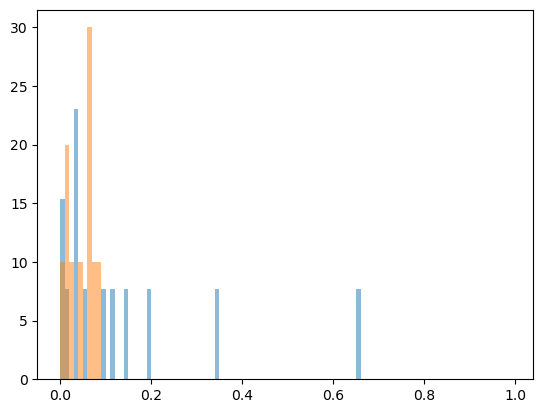

In [28]:
print(np.mean(np.asarray(sparsity_med)))
print(np.median(np.asarray(sparsity_med)))
print(np.mean(np.asarray(sparsity_non_med)))
print(np.median(np.asarray(sparsity_non_med)))
bins = np.arange(0,1,0.01)
plt.hist(sparsity_med, bins, density=True, alpha=0.5)
plt.hist(sparsity_non_med, bins, density=True, alpha=0.5)